## Measures of central tendency & measures of spread

In [163]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df=pd.read_csv('house_price.csv')
df.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615


In [164]:
df.shape

(13200, 7)

#### 1.Mean Function

In [165]:
#mean 
df.price_per_sqft.mean()

7920.336742424242

In [166]:
#median 
df.price_per_sqft.median()

5438.0

In [167]:
#finding null values exist or not
df.price_per_sqft.isnull().any()

False

#### 2.Percentile method

In [168]:
# finding different quantiles 
df.price_per_sqft.quantile([0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
#after 0.85 there is a slight variation

0.25     4267.00
0.35     4734.65
0.45     5176.00
0.55     5685.00
0.65     6363.00
0.75     7317.00
0.85     9333.90
0.95    15312.10
Name: price_per_sqft, dtype: float64

In [169]:
#outliers
dfp_with=df[df.price_per_sqft>df.price_per_sqft.quantile(0.85)]
dfp_with

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
...,...,...,...,...,...,...,...
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


In [170]:
#without outliers
dfp_without=df[df.price_per_sqft<df.price_per_sqft.quantile(0.85)]
dfp_without

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


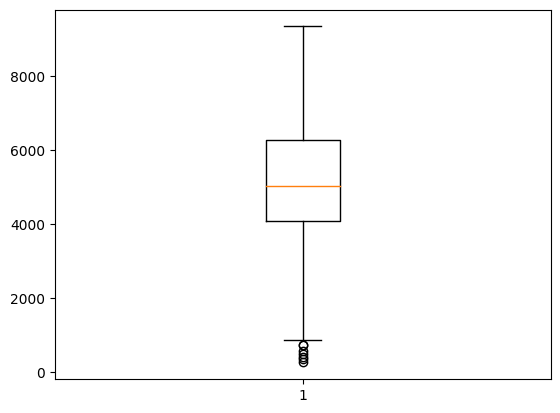

In [171]:
#boxplot
plt.boxplot(dfp_without['price_per_sqft'])
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

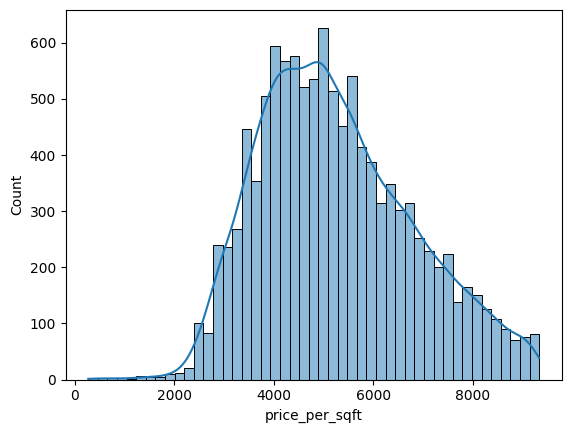

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=dfp_without,x=dfp_without.price_per_sqft,kde=True)

###### approximate normality (the data is close to being normally distributed, but not perfectly normally distributed.)

#### 3.IQR(Inter quartile range method)

In [173]:
q1=df.price_per_sqft.quantile(0.25)
q1

4267.0

In [174]:
q3=df.price_per_sqft.quantile(0.75)
q3

7317.0

In [175]:
iqr=q3-q1
iqr

3050.0

In [176]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
lower,upper

(-308.0, 11892.0)

In [177]:
#outliner points
df_iqr_with=df[(df.price_per_sqft<-308.0)|(df.price_per_sqft>11892.0)]

In [178]:
#without outliers
df_iqr_without=df[(df.price_per_sqft>-308.0)&(df.price_per_sqft<11892.0)]
df_iqr_without

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


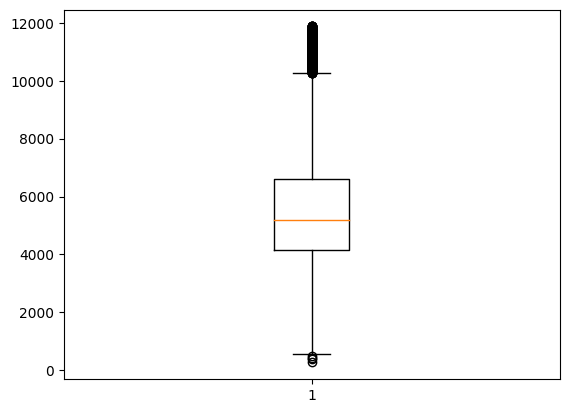

In [179]:
#boxplot
plt.boxplot(df_iqr_without['price_per_sqft'])
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

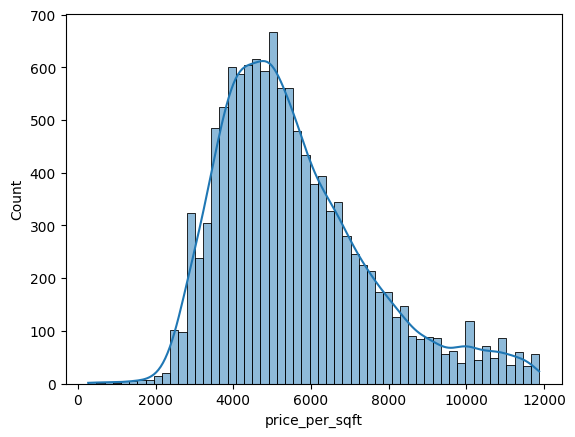

In [180]:
sns.histplot(data=df_iqr_without,x=df_iqr_without.price_per_sqft,kde=True)

###### approximate normality (the data is close to being normally distributed, but not perfectly normally distributed.)

#### 4.Normal distribution

In [181]:
#mean
m=df.price_per_sqft.mean()
m

7920.336742424242

In [182]:
#standard deviation
s=df.price_per_sqft.std()
s

106727.16032810867

In [183]:
m-3*s #-3sigma

-312261.14424190175

In [184]:
m+3*s #+3sigma

328101.8177267502

In [185]:
#values less than -312261 and greater than 328101 are outliers
df_normal=df[(df.price_per_sqft>-312261)&(df.price_per_sqft<328101)]
df_normal

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


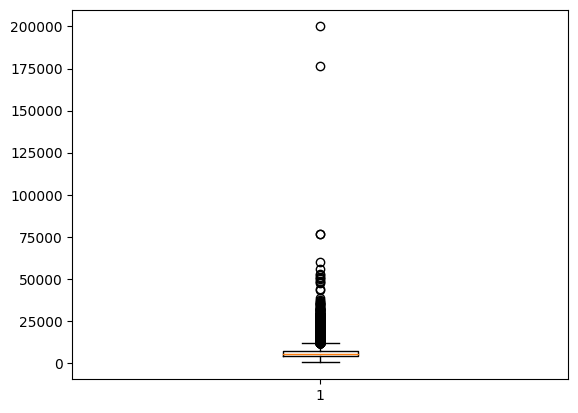

In [186]:
#boxplot
plt.boxplot(df_normal['price_per_sqft'])
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

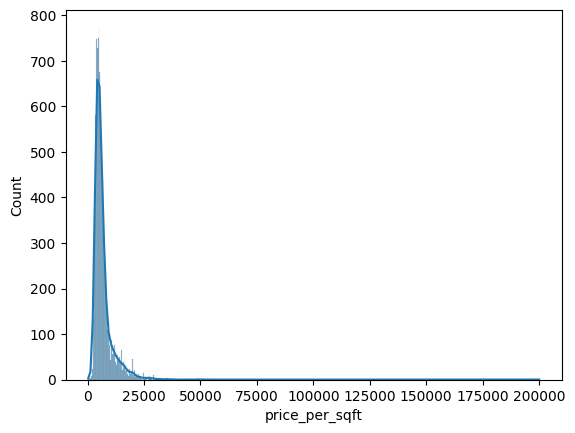

In [187]:
sns.histplot(data=df_normal,x=df_normal.price_per_sqft,kde=True)

###### approximate normality (the data is close to being normally distributed, but not perfectly normally distributed.)

#### 5.Zscore method

In [188]:
#zscore as column
df['zscore']=(df.price_per_sqft-m)/s
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390


In [189]:
#finding outliers in zscore
dfz_with=df[(df.zscore<-3)| (df.zscore>3)]
dfz_with

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105


In [190]:
dfz_without=df[(df.zscore>-3)& (df.zscore<3)]
dfz_without

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


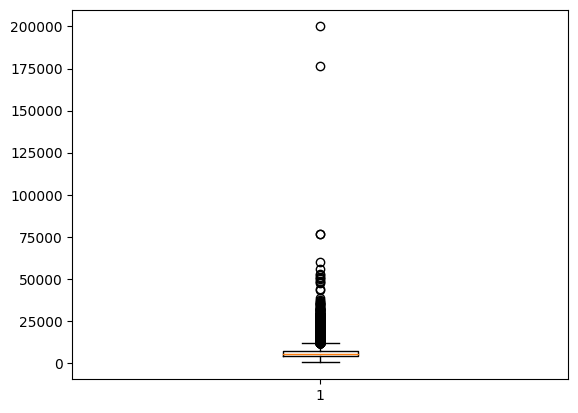

In [191]:
#boxplot
plt.boxplot(dfz_without['price_per_sqft'])
plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

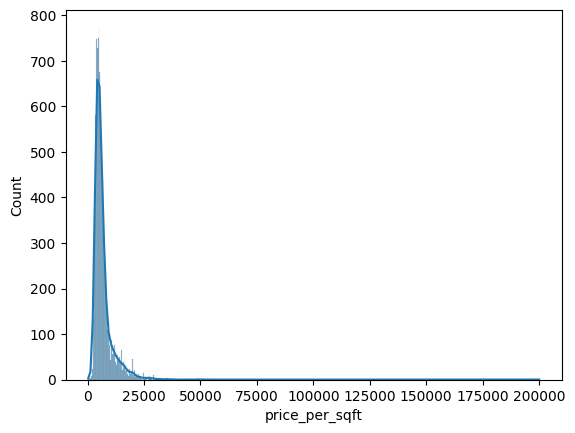

In [192]:
sns.histplot(data=dfz_without,x=dfz_without.price_per_sqft,kde=True)

###### approximate normality (the data is close to being normally distributed, but not perfectly normally distributed.)

#### Correlation between all the numerical columns

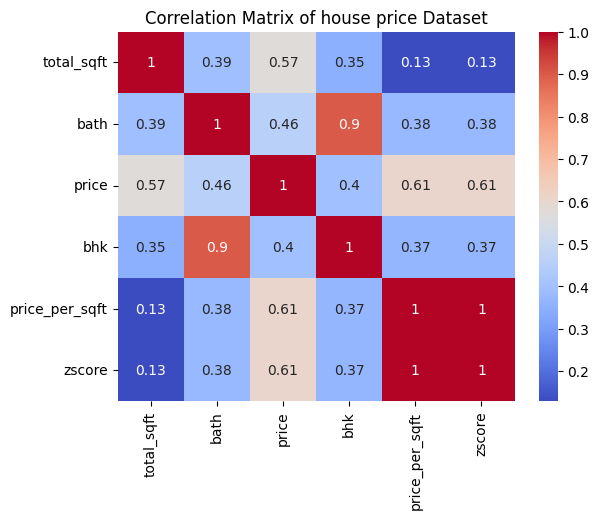

In [193]:
dfz_without_new=dfz_without.drop(['location','size'],axis='columns')
corr = dfz_without_new.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of house price Dataset")
plt.show()

#### Scatter plot between the variables

C:\Users\bsind\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


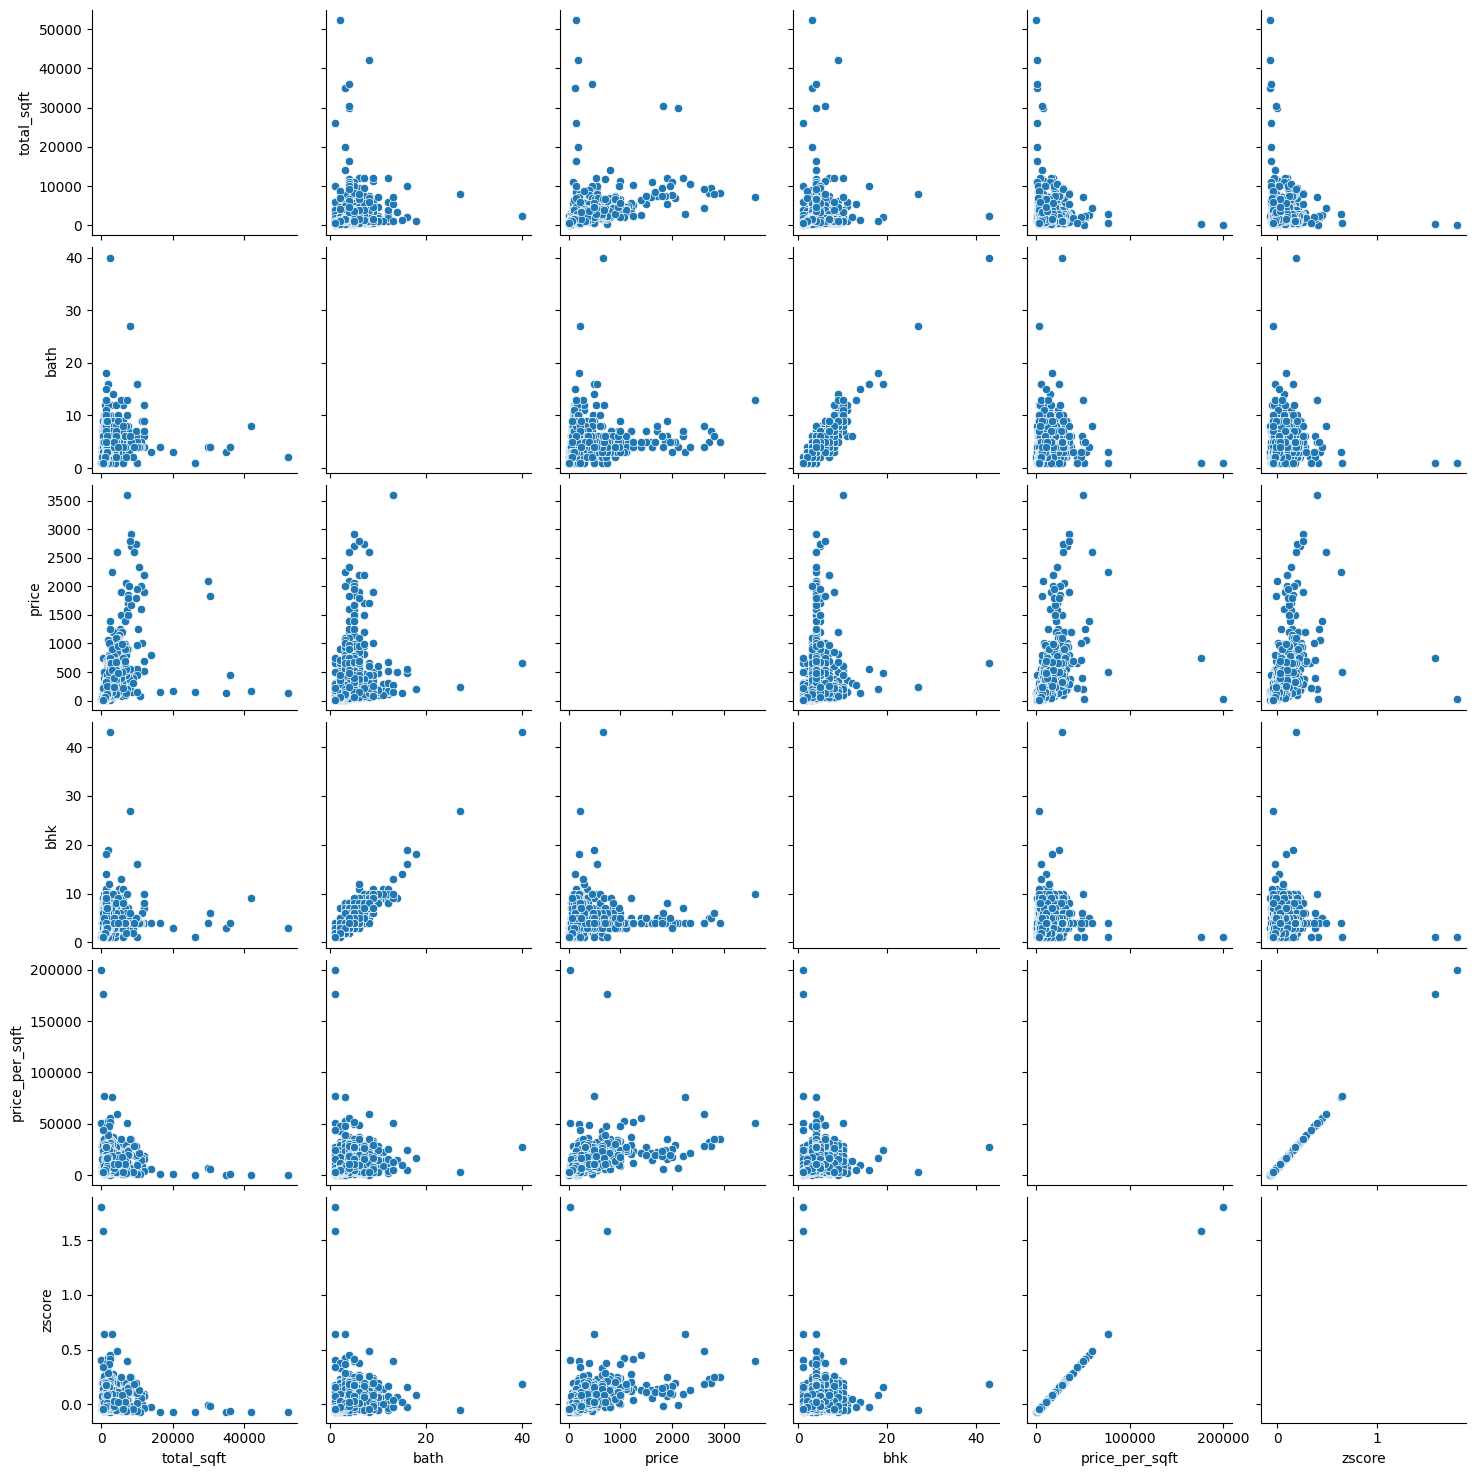

In [194]:

sns.pairplot(dfz_without,  diag_kind='scatter')
plt.show()